In [1]:
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt

In [3]:
xls = pd.ExcelFile('tone_analysis_file.xlsx')
df_britain = pd.read_excel(xls, 'Британія', header=1)
df_germany = pd.read_excel(xls, 'Німеччина', header=1)
df_usa = pd.read_excel(xls, 'США', header=1)
df_france = pd.read_excel(xls, 'Франція', header=1)
df_poland = pd.read_excel(xls, 'Польща', header=1)

In [4]:
datafr_list = [df_britain, df_germany, df_usa, df_france, df_poland]

In [5]:
for elem in datafr_list:
    elem['diff'] = elem['tone pos'] - elem['tone neg']

In [7]:
def np_predict(data, num_of_predictions = 3):
    x = np.arange(data.shape[0])
    y = data
    x_axis_range = np.arange(y.shape[0] + num_of_predictions)

    fittedParameters = np.polyfit(x, y, 2)

    return x_axis_range, np.concatenate((data, np.polyval(fittedParameters, x_axis_range)[-num_of_predictions:]))

In [8]:
x_axis_br, values_br =  np_predict(df_britain['diff'].to_numpy())

x_axis_ger, values_ger =  np_predict(df_germany['diff'].to_numpy())

x_axis_usa, values_usa =  np_predict(df_usa['diff'].to_numpy())

x_axis_fr, values_fr =  np_predict(df_france['diff'].to_numpy())

x_axis_pl, values_pl =  np_predict(df_poland['diff'].to_numpy())

In [9]:
print('Great Britain')
print(values_br[-3:])

Great Britain
[-1.28487143 -1.57667907 -1.88086381]


In [10]:
print('Germany')
print(values_ger[-3:])

Germany
[-1.92588235 -2.53892157 -3.19379257]


In [11]:
print('USA')
print(values_usa[-3:])

USA
[-1.18195614 -1.84876316 -2.5763756 ]


In [12]:
print('France')
print(values_fr[-3:])

France
[ 0.56154412  0.07648994 -0.48981166]


In [13]:
print('Poland')
print(values_pl[-3:])

Poland
[3.45823529 4.76740196 6.21373323]


Text(0.5, 1.0, 'Great Britain')

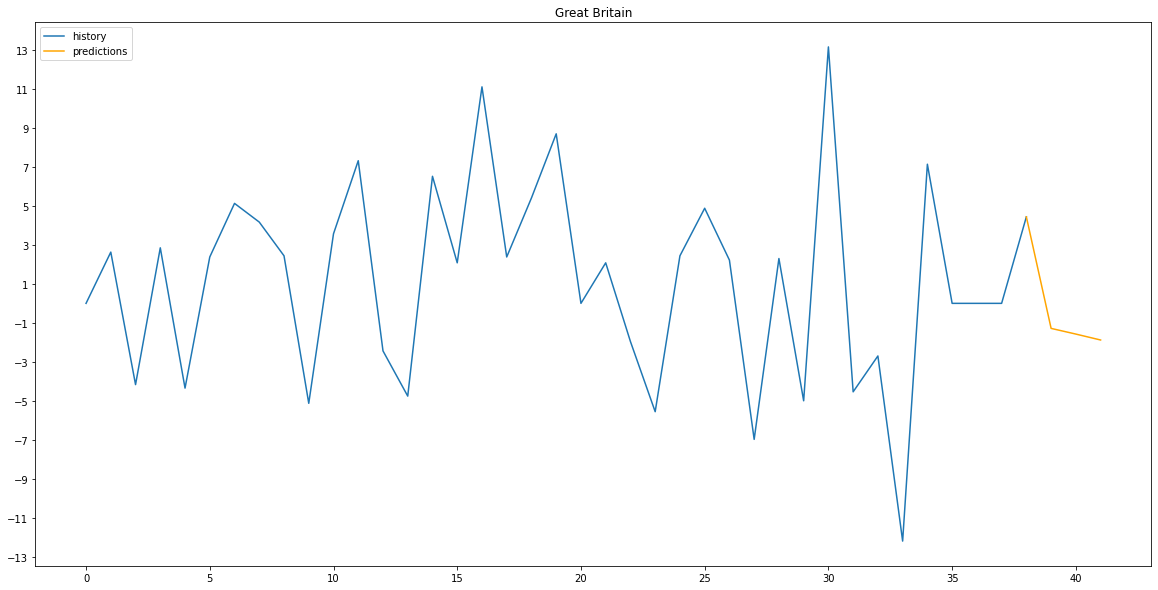

In [15]:
plt.rcParams["figure.figsize"] = (20, 10)
fig, ax = plt.subplots()
ax.yaxis.set_ticks(np.arange(-15, 15, 2))
ax.xaxis.set_ticks(np.arange(0, len(values_br), 5))


plt.plot(np.arange(len(df_britain['diff'].to_numpy())), df_britain['diff'].to_numpy(), label="history")
plt.plot(x_axis_br[-4:], values_br[-4:], color='orange', label="predictions")
plt.legend(loc='upper left')
plt.title("Great Britain")

Text(0.5, 1.0, 'Germany')

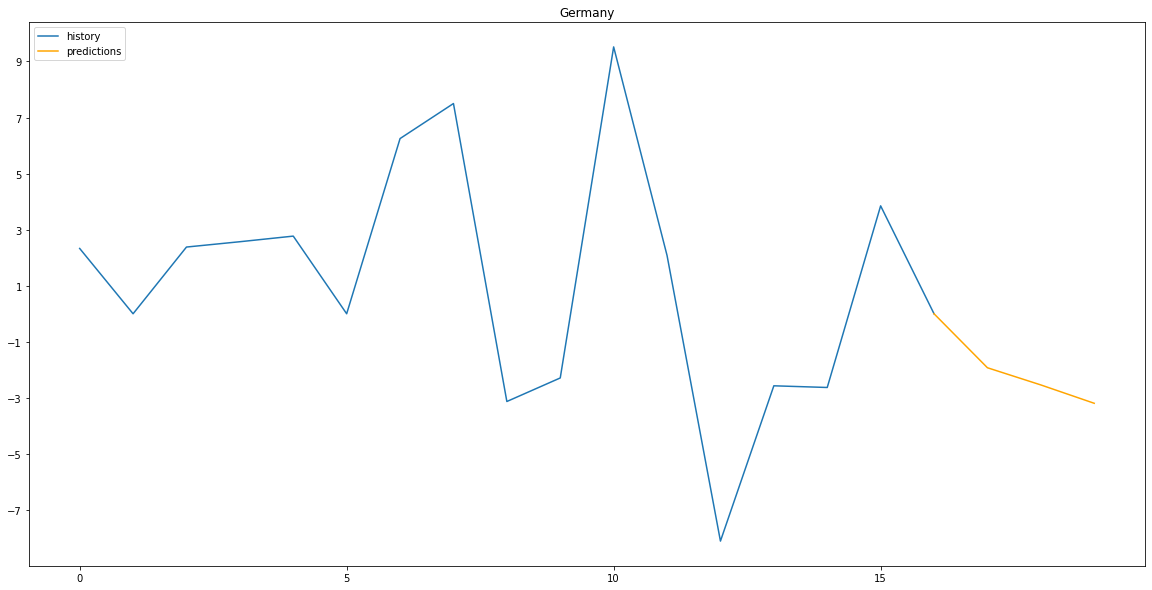

In [16]:
plt.rcParams["figure.figsize"] = (20, 10)
fig, ax = plt.subplots()
ax.yaxis.set_ticks(np.arange(-15, 15, 2))
ax.xaxis.set_ticks(np.arange(0, len(values_ger), 5))


plt.plot(np.arange(len(df_germany['diff'].to_numpy())), df_germany['diff'].to_numpy(), label="history")
plt.plot(x_axis_ger[-4:], values_ger[-4:], color='orange', label="predictions")
plt.legend(loc='upper left')
plt.title("Germany")

Text(0.5, 1.0, 'USA')

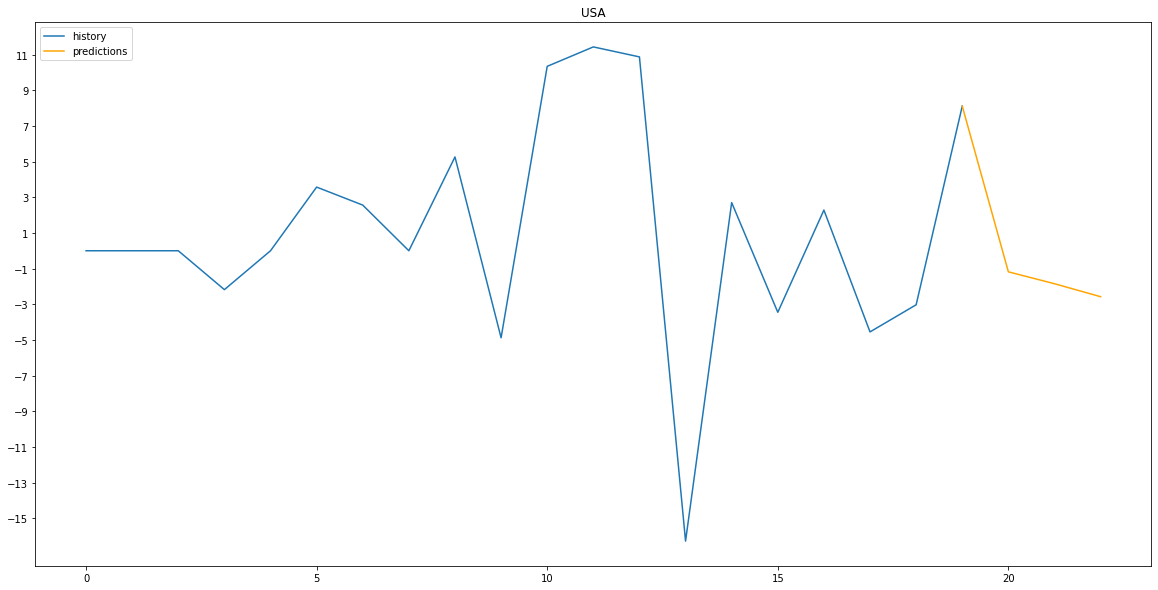

In [17]:
plt.rcParams["figure.figsize"] = (20, 10)
fig, ax = plt.subplots()
ax.yaxis.set_ticks(np.arange(-15, 15, 2))
ax.xaxis.set_ticks(np.arange(0, len(values_usa), 5))


plt.plot(np.arange(len(df_usa['diff'].to_numpy())), df_usa['diff'].to_numpy(), label="history")
plt.plot(x_axis_usa[-4:], values_usa[-4:], color='orange', label="predictions")
plt.legend(loc='upper left')
plt.title("USA")

Text(0.5, 1.0, 'France')

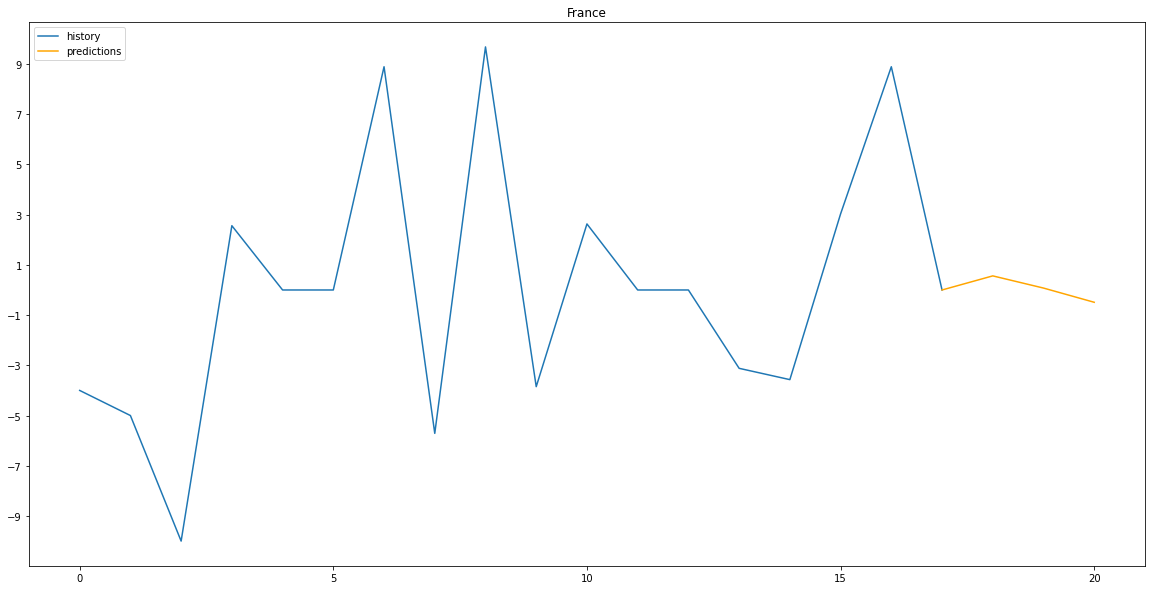

In [18]:
plt.rcParams["figure.figsize"] = (20, 10)
fig, ax = plt.subplots()
ax.yaxis.set_ticks(np.arange(-15, 15, 2))
ax.xaxis.set_ticks(np.arange(0, len(values_fr), 5))


plt.plot(np.arange(len(df_france['diff'].to_numpy())), df_france['diff'].to_numpy(), label="history")
plt.plot(x_axis_fr[-4:], values_fr[-4:], color='orange', label="predictions")
plt.legend(loc='upper left')
plt.title("France")

Text(0.5, 1.0, 'Poland')

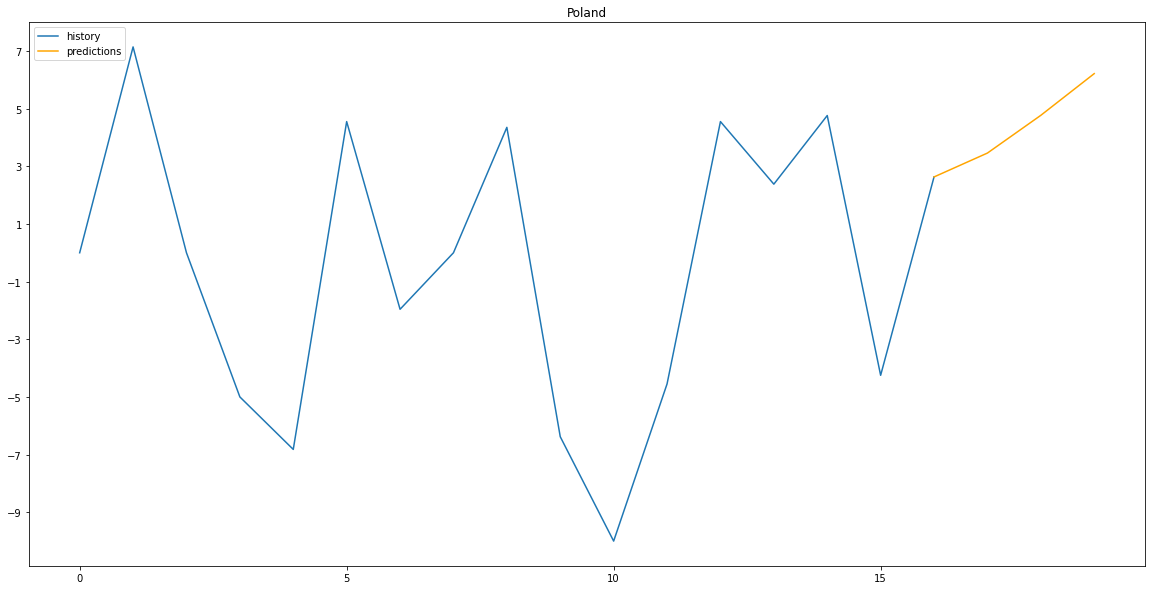

In [19]:
plt.rcParams["figure.figsize"] = (20, 10)
fig, ax = plt.subplots()
ax.yaxis.set_ticks(np.arange(-15, 15, 2))
ax.xaxis.set_ticks(np.arange(0, len(values_pl), 5))


plt.plot(np.arange(len(df_poland['diff'].to_numpy())), df_poland['diff'].to_numpy(), label="history")
plt.plot(x_axis_pl[-4:], values_pl[-4:], color='orange', label="predictions")
plt.legend(loc='upper left')
plt.title("Poland")

Text(0.5, 1.0, 'Poland')

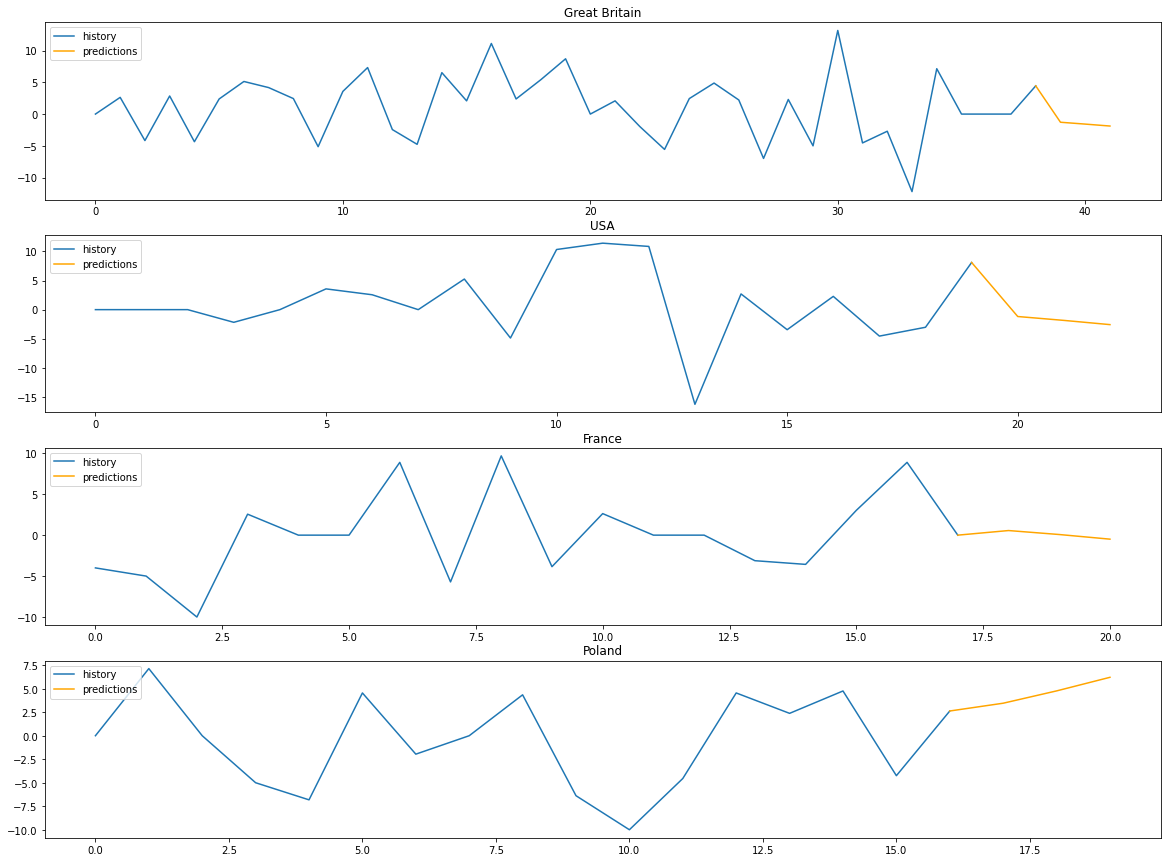

In [21]:
fig, ax = plt.subplots(4, 1, sharex=False, sharey=False)
fig.set_figheight(15)
fig.set_figwidth(20)


ax[0].plot(np.arange(len(df_britain['diff'].to_numpy())), df_britain['diff'].to_numpy(), label="history")
ax[0].plot(x_axis_br[-4:], values_br[-4:], color='orange', label="predictions")
ax[0].legend(loc='upper left')
ax[0].set_title('Great Britain')


ax[1].plot(np.arange(len(df_usa['diff'].to_numpy())), df_usa['diff'].to_numpy(), label="history")
ax[1].plot(x_axis_usa[-4:], values_usa[-4:], color='orange', label="predictions")
ax[1].legend(loc='upper left')
ax[1].set_title("USA")

ax[2].plot(np.arange(len(df_france['diff'].to_numpy())), df_france['diff'].to_numpy(), label="history")
ax[2].plot(x_axis_fr[-4:], values_fr[-4:], color='orange', label="predictions")
ax[2].legend(loc='upper left')
ax[2].set_title("France")


ax[3].plot(np.arange(len(df_poland['diff'].to_numpy())), df_poland['diff'].to_numpy(), label="history")
ax[3].plot(x_axis_pl[-4:], values_pl[-4:], color='orange', label="predictions")
ax[3].legend(loc='upper left')
ax[3].set_title("Poland")